In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/Users/parthsharma/Desktop/Data Science CB/Practice/archive/Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.shape

(8523, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
import seaborn as sns

In [6]:
df_corr=df.corr()

In [7]:
df_corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [8]:
from sklearn.feature_selection import chi2

In [9]:
x=df.iloc[:,0:11]




In [10]:
y=df.iloc[:,11]
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [11]:
from sklearn.feature_selection import SelectKBest
best_features=SelectKBest(chi2,k=11)

In [12]:
df.groupby('Outlet_Type').size()

Outlet_Type
Grocery Store        1083
Supermarket Type1    5577
Supermarket Type2     928
Supermarket Type3     935
dtype: int64

<AxesSubplot:ylabel='Outlet_Type'>

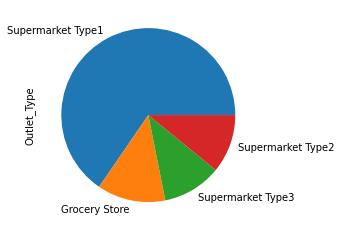

In [13]:
df['Outlet_Type'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='Outlet_Type'>

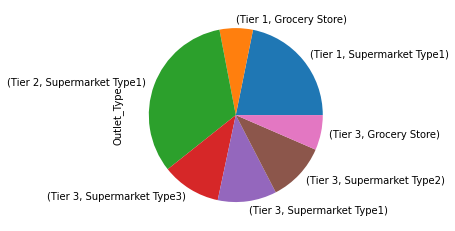

In [14]:
df.groupby(['Outlet_Location_Type'])['Outlet_Type'].value_counts().plot(kind='pie')

In [15]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [16]:
df['Item_Fat_Content']=df['Item_Fat_Content'].map({'Low Fat':1,'low fat':1,'LF':1,'Regular':2,'reg':2})

In [17]:
df['Item_Fat_Content'].value_counts()

1    5517
2    3006
Name: Item_Fat_Content, dtype: int64

In [18]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [19]:
df['Outlet_Size']=df['Outlet_Size'].map({'Medium':1,'Small':2,'High':3})
df['Outlet_Size'].value_counts()

1.0    2793
2.0    2388
3.0     932
Name: Outlet_Size, dtype: int64

In [20]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,1,0.016047,Dairy,249.8092,OUT049,1999,1.0,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,2009,1.0,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,1,0.016760,Meat,141.6180,OUT049,1999,1.0,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,2,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,1,0.000000,Household,53.8614,OUT013,1987,3.0,Tier 3,Supermarket Type1,994.7052


In [21]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [22]:
col_to_drop=['Item_Identifier','Item_Visibility','Outlet_Identifier','Outlet_Establishment_Year']
df=df.drop(col_to_drop,axis=1)
df.head()

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,1,Dairy,249.8092,1.0,Tier 1,Supermarket Type1,3735.1380
1,5.92,2,Soft Drinks,48.2692,1.0,Tier 3,Supermarket Type2,443.4228
2,17.50,1,Meat,141.6180,1.0,Tier 1,Supermarket Type1,2097.2700
3,19.20,2,Fruits and Vegetables,182.0950,NaN,Tier 3,Grocery Store,732.3800
4,8.93,1,Household,53.8614,3.0,Tier 3,Supermarket Type1,994.7052


In [23]:
df.shape

(8523, 8)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           7060 non-null   float64
 1   Item_Fat_Content      8523 non-null   int64  
 2   Item_Type             8523 non-null   object 
 3   Item_MRP              8523 non-null   float64
 4   Outlet_Size           6113 non-null   float64
 5   Outlet_Location_Type  8523 non-null   object 
 6   Outlet_Type           8523 non-null   object 
 7   Item_Outlet_Sales     8523 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 532.8+ KB


In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['Outlet_Type']=le.fit_transform(df['Outlet_Type'])

In [26]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,1,Dairy,249.8092,1.0,Tier 1,1,3735.1380
1,5.92,2,Soft Drinks,48.2692,1.0,Tier 3,2,443.4228
2,17.50,1,Meat,141.6180,1.0,Tier 1,1,2097.2700
3,19.20,2,Fruits and Vegetables,182.0950,NaN,Tier 3,0,732.3800
4,8.93,1,Household,53.8614,3.0,Tier 3,1,994.7052


In [27]:
df['Outlet_Type'].value_counts()

1    5577
0    1083
3     935
2     928
Name: Outlet_Type, dtype: int64

In [28]:
df['Item_Type']=le.fit_transform(df['Item_Type'])
df['Outlet_Location_Type']=le.fit_transform(df['Outlet_Location_Type'])


In [29]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,1,4,249.8092,1.0,0,1,3735.1380
1,5.92,2,14,48.2692,1.0,2,2,443.4228
2,17.50,1,10,141.6180,1.0,0,1,2097.2700
3,19.20,2,6,182.0950,NaN,2,0,732.3800
4,8.93,1,9,53.8614,3.0,2,1,994.7052


In [30]:
df['Item_Type'].value_counts()

6     1232
13    1200
9      910
5      856
4      682
3      649
0      648
8      520
14     445
10     425
1      251
7      214
11     169
15     148
2      110
12      64
Name: Item_Type, dtype: int64

In [31]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)


In [32]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,1,4,249.8092,1.0,0,1,3735.1380
1,5.92,2,14,48.2692,1.0,2,2,443.4228
2,17.50,1,10,141.6180,1.0,0,1,2097.2700
3,19.20,2,6,182.0950,NaN,2,0,732.3800
4,8.93,1,9,53.8614,3.0,2,1,994.7052


In [33]:
df['Outlet_Size'].fillna(df['Outlet_Size'].mean(),inplace=True)

In [34]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,1,4,249.8092,1.000000,0,1,3735.1380
1,5.92,2,14,48.2692,1.000000,2,2,443.4228
2,17.50,1,10,141.6180,1.000000,0,1,2097.2700
3,19.20,2,6,182.0950,1.695567,2,0,732.3800
4,8.93,1,9,53.8614,3.000000,2,1,994.7052


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           8523 non-null   float64
 1   Item_Fat_Content      8523 non-null   int64  
 2   Item_Type             8523 non-null   int64  
 3   Item_MRP              8523 non-null   float64
 4   Outlet_Size           8523 non-null   float64
 5   Outlet_Location_Type  8523 non-null   int64  
 6   Outlet_Type           8523 non-null   int64  
 7   Item_Outlet_Sales     8523 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 532.8 KB


In [36]:
df_corr=df.corr()
print(df_corr)

                      Item_Weight  Item_Fat_Content  Item_Type  Item_MRP  \
Item_Weight              1.000000         -0.021157   0.028015  0.024756   
Item_Fat_Content        -0.021157          1.000000  -0.139434  0.006063   
Item_Type                0.028015         -0.139434   1.000000  0.032651   
Item_MRP                 0.024756          0.006063   0.032651  1.000000   
Outlet_Size              0.005761         -0.004451  -0.006122  0.006248   
Outlet_Location_Type     0.004088         -0.001598   0.003084  0.000232   
Outlet_Type             -0.000566          0.002199   0.003053 -0.001975   
Item_Outlet_Sales        0.011550          0.018719   0.017048  0.567574   

                      Outlet_Size  Outlet_Location_Type  Outlet_Type  \
Item_Weight              0.005761              0.004088    -0.000566   
Item_Fat_Content        -0.004451             -0.001598     0.002199   
Item_Type               -0.006122              0.003084     0.003053   
Item_MRP                 0.

In [37]:
df_corr

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.021157,0.028015,0.024756,0.005761,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.021157,1.000000,-0.139434,0.006063,-0.004451,-0.001598,0.002199,0.018719
Item_Type,0.028015,-0.139434,1.000000,0.032651,-0.006122,0.003084,0.003053,0.017048
Item_MRP,0.024756,0.006063,0.032651,1.000000,0.006248,0.000232,-0.001975,0.567574
Outlet_Size,0.005761,-0.004451,-0.006122,0.006248,1.000000,0.029147,-0.509894,-0.115721
Outlet_Location_Type,0.004088,-0.001598,0.003084,0.000232,0.029147,1.000000,0.467219,0.089367
Outlet_Type,-0.000566,0.002199,0.003053,-0.001975,-0.509894,0.467219,1.000000,0.401522
Item_Outlet_Sales,0.011550,0.018719,0.017048,0.567574,-0.115721,0.089367,0.401522,1.000000


In [38]:
df.drop('Outlet_Size',axis=1)

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,1,4,249.8092,0,1,3735.1380
1,5.920,2,14,48.2692,2,2,443.4228
2,17.500,1,10,141.6180,0,1,2097.2700
3,19.200,2,6,182.0950,2,0,732.3800
4,8.930,1,9,53.8614,2,1,994.7052
...,...,...,...,...,...,...,...
8518,6.865,1,13,214.5218,2,1,2778.3834
8519,8.380,2,0,108.1570,1,1,549.2850
8520,10.600,1,8,85.1224,1,1,1193.1136
8521,7.210,2,13,103.1332,2,2,1845.5976


In [39]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,1,4,249.8092,1.000000,0,1,3735.1380
1,5.92,2,14,48.2692,1.000000,2,2,443.4228
2,17.50,1,10,141.6180,1.000000,0,1,2097.2700
3,19.20,2,6,182.0950,1.695567,2,0,732.3800
4,8.93,1,9,53.8614,3.000000,2,1,994.7052


In [40]:
X=df.values

In [41]:
u=np.mean(X,axis=0)
std=np.std(X,axis=0)

X=(X-u)/std

In [42]:
X

array([[-0.84187169, -0.73814723, -0.76647929, ..., -1.36933384,
        -0.25265831,  0.910601  ],
       [-1.64170589,  1.35474328,  1.6089627 , ...,  1.09156913,
         1.00297245, -1.01844035],
       [ 1.09855449, -0.73814723,  0.6587859 , ..., -1.36933384,
        -0.25265831, -0.04923754],
       ...,
       [-0.53424315, -0.73814723,  0.1836975 , ..., -0.13888236,
        -0.25265831, -0.57909963],
       [-1.33644372,  1.35474328,  1.3714185 , ...,  1.09156913,
         1.00297245, -0.19672492],
       [ 0.45963367, -0.73814723,  1.6089627 , ..., -1.36933384,
        -0.25265831, -0.82959407]])

In [43]:
def hypothesis(x,theta):
    return np.dot(x,theta)

def hypothesis1(X,theta):
    return np.dot(X,theta)

def error(x,y,theta):
    e=0.0
    y_=hypothesis(x,theta)
    e=np.sum((y-y_)**2)
    
    return e/x.shape[0]

def error1(X,y,theta):
    e = 0.0
    y_ = hypothesis1(X,theta)
    e = np.sum((y-y_)**2)
    
    return e/X.shape[0]

def gradient(x,y,theta):
    
    y_=hypothesis(x,theta)
    grad=np.dot(x.T,(y_-y))
    
    return grad/x.shape[0]

def gradient1(X,y,theta):
    
    y_ = hypothesis1(X,theta)
    grad = np.dot(X.T,(y_ - y))
    m = X.shape[0]
    return grad/m

def gradient_descent(X,y,learning_rate = 0.1,max_iters=300):
    
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_iters):
        e = error(X,y,theta)
        error_list.append(e)
        
        #Gradient descent
        grad = gradient(X,y,theta)
        theta = theta - learning_rate*grad
        
    return theta,error_list  

In [44]:
def hypothesis1(X,theta):
    return np.dot(X,theta)

def error1(X,y,theta):
    e = 0.0
    y_ = hypothesis1(X,theta)
    e = np.sum((y-y_)**2)
    
    return e/X.shape[0]
    
def gradient1(X,y,theta):
    
    y_ = hypothesis1(X,theta)
    grad = np.dot(X.T,(y_ - y))
    m = X.shape[0]
    return grad/m

def gradient_descent1(X,y,learning_rate = 0.1,max_iters=300):
    
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_iters):
        e = error1(X,y,theta)
        error_list.append(e)
        
        #Gradient descent
        grad = gradient1(X,y,theta)
        theta = theta - learning_rate*grad
        
    return theta,error_list   

In [45]:
a=np.ones((x.shape[0],1))
X=np.hstack((a,X))
print(X)

[[ 1.         -0.84187169 -0.73814723 ... -1.36933384 -0.25265831
   0.910601  ]
 [ 1.         -1.64170589  1.35474328 ...  1.09156913  1.00297245
  -1.01844035]
 [ 1.          1.09855449 -0.73814723 ... -1.36933384 -0.25265831
  -0.04923754]
 ...
 [ 1.         -0.53424315 -0.73814723 ... -0.13888236 -0.25265831
  -0.57909963]
 [ 1.         -1.33644372  1.35474328 ...  1.09156913  1.00297245
  -0.19672492]
 [ 1.          0.45963367 -0.73814723 ... -1.36933384 -0.25265831
  -0.82959407]]


In [46]:
X.shape

(8523, 9)

In [47]:
x=X[:,:-1]
y=X[:,-1]

In [48]:
x

array([[ 1.        , -0.84187169, -0.73814723, ..., -1.14261024,
        -1.36933384, -0.25265831],
       [ 1.        , -1.64170589,  1.35474328, ..., -1.14261024,
         1.09156913,  1.00297245],
       [ 1.        ,  1.09855449, -0.73814723, ..., -1.14261024,
        -1.36933384, -0.25265831],
       ...,
       [ 1.        , -0.53424315, -0.73814723, ...,  0.50009352,
        -0.13888236, -0.25265831],
       [ 1.        , -1.33644372,  1.35474328, ..., -1.14261024,
         1.09156913,  1.00297245],
       [ 1.        ,  0.45963367, -0.73814723, ...,  0.50009352,
        -1.36933384, -0.25265831]])

In [49]:
y

array([ 0.910601  , -1.01844035, -0.04923754, ..., -0.57909963,
       -0.19672492, -0.82959407])

In [50]:
print(x.shape,y.shape)

(8523, 8) (8523,)


In [51]:
split=int(0.8*x.shape[0])
split_y=int(0.8*y.shape[0])
x_train=x[:split,:]
y_train=y[:split_y]

x_test=x[split:,:]
y_test=y[split_y: ]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(6818, 8)
(6818,)
(1705, 8)
(1705,)


In [52]:
theta,error_list=gradient_descent(x_train,y_train)

In [53]:
print(error_list)

[0.9925546778014864, 0.8993637603884314, 0.8257925845094424, 0.7673260944549388, 0.7205590387240618, 0.6829077023327276, 0.6523999987269172, 0.6275218571337517, 0.6071042154476152, 0.5902394284068316, 0.5762190837958202, 0.5644874762789369, 0.5546065929039494, 0.5462296082660942, 0.5390807056103474, 0.5329396275792685, 0.5276297836688086, 0.5230090478598137, 0.5189626026702159, 0.5153973486374591, 0.5122375177720845, 0.5094212177782984, 0.5068976993629102, 0.5046251878816247, 0.5025691573165968, 0.5007009523342025, 0.4989966852563595, 0.4974363508851937, 0.49600311449117007, 0.4946827378248437, 0.49346311542130167, 0.4923338992406984, 0.4912861942079597, 0.49031231076639203, 0.48940556336103597, 0.48856010598407645, 0.4877707976737521, 0.48703309225812436, 0.486342947751847, 0.48569675170690635, 0.4850912595334978, 0.4845235433810903, 0.48399094963095657, 0.48349106342263365, 0.48302167893589054, 0.4825807743910763, 0.4821664909255852, 0.4817771146616888, 0.4814110614084123, 0.48106686

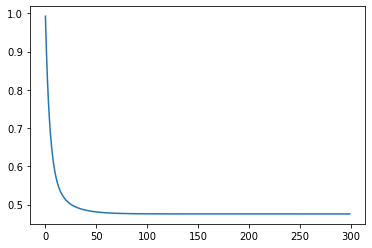

In [54]:
plt.plot(error_list)

In [55]:
theta

array([-5.75423677e-04, -2.92490814e-03,  1.69351013e-02, -3.10710459e-03,
        5.72072321e-01,  1.85710047e-01, -1.91650330e-01,  5.81331410e-01])

In [56]:
ypreds=[]
for i in range(x_train.shape[0]):
    y_=hypothesis(x_train[i],theta)
    ypreds.append(y_)
    
ypreds=np.array(ypreds)    

In [57]:
def r2_score(y,y_):
    num = np.sum((y-y_)**2)
    denom = np.sum((y- y.mean())**2)
    score = (1- num/denom)
    return score*100

In [58]:
r2_score(y_train,ypreds)

52.08727013962153

In [59]:
ypreds=[]
for i in range(x_test.shape[0]):
    y_=hypothesis(x_test[i],theta)
    ypreds.append(y_)
    
ypreds=np.array(ypreds)  

In [60]:
r2_score(y_test,ypreds)

51.20539407065854

In [61]:
def mini_batch_gradient_descent(X,y,batch_size=400,learning_rate=0.001,max_itrs=500):
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    
    data=np.hstack((X,y.reshape(-1,1)))
    for i in range(max_itrs):
        e = error(X,y,theta)
        error_list.append(e)
        
        #Mini Btach Gradient descent
        np.random.shuffle(data)
        m=data.shape[0]
        total_batches=m//batch_size
        
        for i in range(total_batches):
            batch_data=data[i*batch_size:(i+1)*batch_size,:]
            
            x_batch=batch_data[:,:-1]
            y_batch=batch_data[:,-1]
            
            batch_grad=gradient(x_batch,y_batch,theta)
            theta=theta-learning_rate*batch_grad
            e = error(x_batch,y_batch,theta)
            error_list.append(e)
            
            
            
        
    return theta,error_list 

In [62]:
theta1,error_list1=mini_batch_gradient_descent(x_train,y_train)

In [63]:
print(error_list1)

[0.9925546778014864, 0.9357317010839955, 0.980306954938699, 1.022016075407456, 0.9584700784165786, 0.8609781312520292, 0.9349399962669795, 0.8548915404721533, 1.1398433232013916, 1.0056298412077265, 0.9683836924624799, 0.8844734979982403, 1.0065163039591514, 1.149425380385951, 1.0942617162113, 0.9405031761724553, 0.9247520706859227, 1.0580784226783797, 0.9760796413376763, 1.0033084455473351, 1.104708809547239, 0.9822536465482591, 1.1946740993678013, 0.8809885322342157, 0.9621124057440644, 0.840047365437047, 1.232429237871925, 0.9660672020565325, 0.8768010733283049, 0.8371697004978174, 0.9023172348262903, 0.9765619892028553, 0.8903493122487742, 0.8936691812262586, 0.9227121504878937, 0.9456492340538418, 0.9602599663189384, 0.9932791750506715, 0.873947144943333, 0.8932078579734494, 0.9413348080013034, 0.8674001649336869, 0.9484636262751414, 0.9072665113058729, 1.071795796843487, 1.0043160536051936, 0.8951826577759383, 0.925141237704615, 0.9147959042820452, 1.0165547691523775, 1.060370545

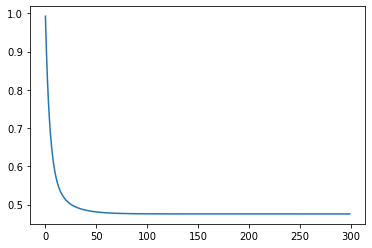

In [64]:
plt.plot(error_list)

In [65]:
theta

array([-5.75423677e-04, -2.92490814e-03,  1.69351013e-02, -3.10710459e-03,
        5.72072321e-01,  1.85710047e-01, -1.91650330e-01,  5.81331410e-01])

In [95]:
y_pred=hypothesis(x_train,theta)

In [96]:
y_pred

array([ 0.89479874, -0.66799347, -0.10923151, ...,  0.36912216,
        0.46063074,  0.06245026])

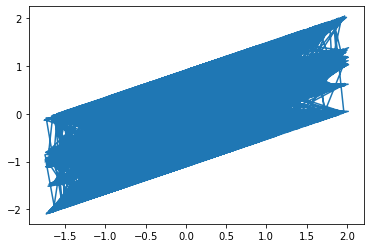

In [97]:
plt.plot(x_train[:,4],y_pred)
plt.show()

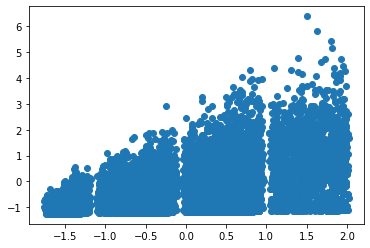

In [89]:
plt.scatter(x[:,4],y)

In [90]:
x_train.shape

(6818, 8)

In [74]:
y_train.shape

(6818,)